In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




df = pd.read_csv("anime.csv")

In [2]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
df['type'].value_counts()

type
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: count, dtype: int64

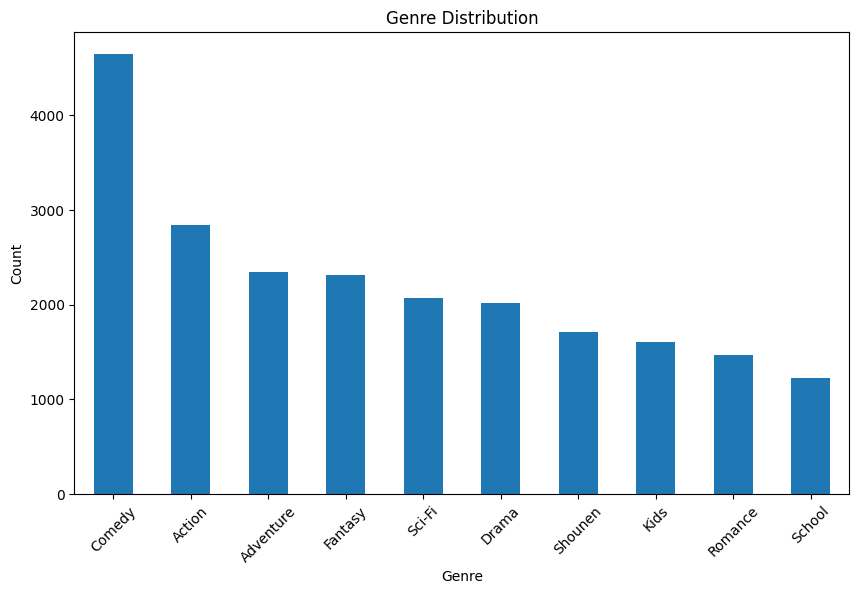

In [4]:
genre_counts = df['genre'].str.split(',').explode().str.strip().value_counts()

genre_counts.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

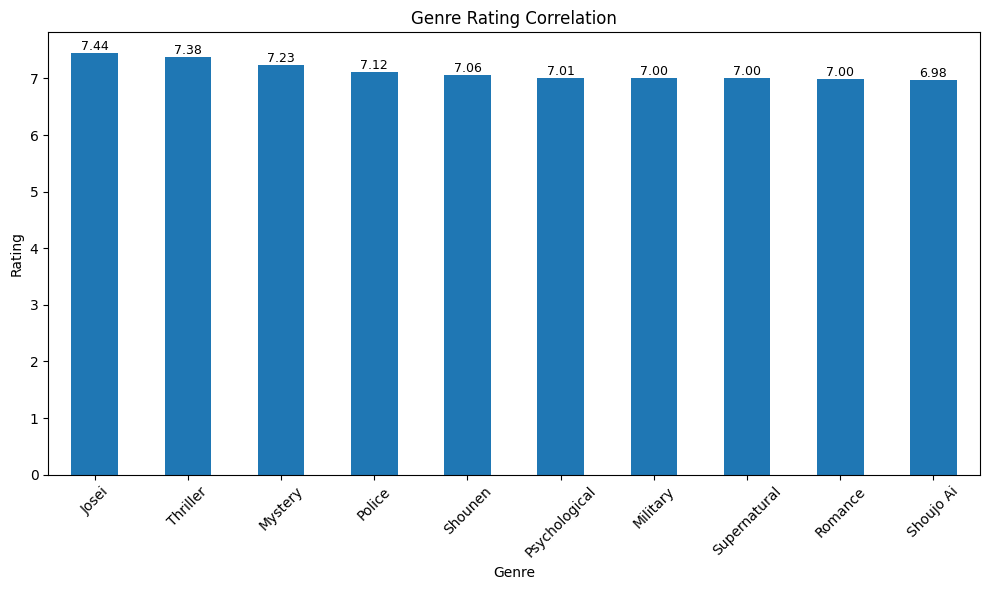

In [5]:
# genre rating correlation

df['genre_list'] = df['genre'].str.split(', ')
df_exploded = df.explode('genre_list')

genre_rating = df_exploded.groupby('genre_list')['rating'].mean().sort_values(ascending=False)


ax =genre_rating.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Genre Rating Correlation')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=9, rotation=0)

plt.tight_layout()
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'TV'),
  Text(1, 0, 'OVA'),
  Text(2, 0, 'Movie'),
  Text(3, 0, 'Special'),
  Text(4, 0, 'ONA'),
  Text(5, 0, 'Music')])

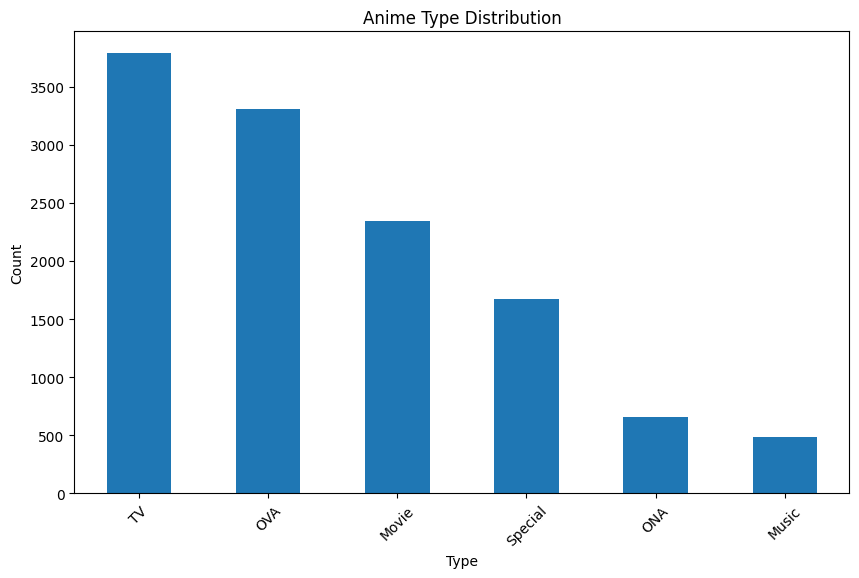

In [8]:
anime_type = df.groupby('type').size().sort_values(ascending=False)


ax =anime_type.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Anime Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

Members rating correlation

In [ ]:
# Drop rows with missing values in these columns
df_clean_members = df.dropna(subset=['members', 'rating'])

correlation = df_clean_members['members'].corr(df_clean_members['rating'])
print(f"Correlation between members and rating: {correlation:.3f}")







# Drop rows with missing values in these columns

Correlation between members and rating: 0.388


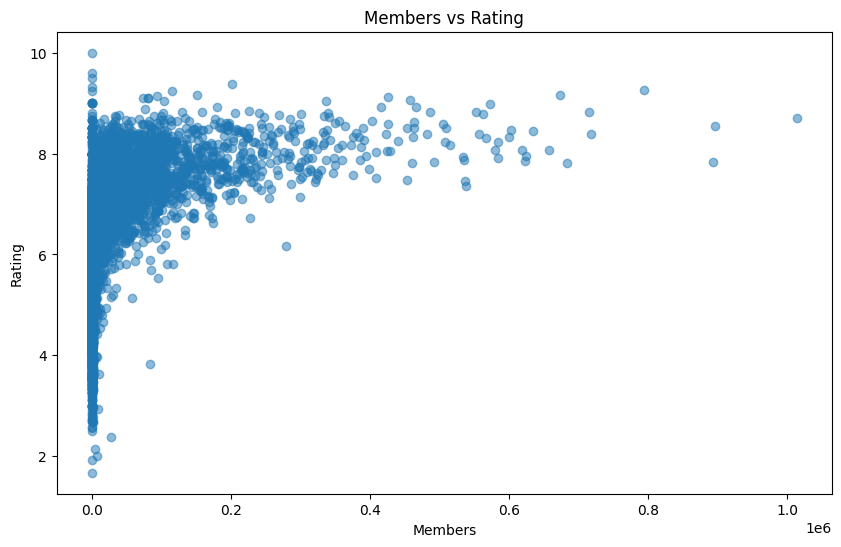

In [ ]:
# Drop rows with missing values in these columns

plt.figure(figsize=(10, 6))
plt.scatter(df_clean_members['members'], df_clean_members['rating'], alpha=0.5)
plt.title('Members vs Rating')
plt.xlabel('Members')
plt.ylabel('Rating')
plt.show()






rating episode correlation

In [ ]:

#drop every type not an tv anime
df_tv = df.drop(df[df['type'] != 'TV'].index)
df_tv = df_tv.dropna(subset=['rating', 'episodes'])
df_tv['episodes'] = pd.to_numeric(df_tv['episodes'], errors='coerce')

ep_corr = df_tv['rating'].corr(df_tv['episodes'])
ep_corr = df_tv['rating'].corr(df_tv['episodes'])

print(f"Correlation between rating and episodes: {ep_corr:.3f}")


Correlation between rating and episodes: -0.026


In [ ]:
#add genre count row
df['genre_list'] = df['genre'].fillna('').str.split(', ')
df['genre_count'] = df['genre_list'].apply(len)
df.head()

,anime_id,name,genre,type,episodes,rating,members,genre_list,genre_count
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"[Drama, Romance, School, Supernatural]",4
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",7
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,"[Action, Comedy, Historical, Parody, Samurai, ...",7
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,"[Sci-Fi, Thriller]",2
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,"[Action, Comedy, Historical, Parody, Samurai, ...",7


In [ ]:
#regression analysis

import statsmodels.api as sm


# Select your features and target
X = df[['members', 'episodes', 'genre_count']].copy()
y = df['rating'].copy()

# Convert to numeric, coerce errors to NaN
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Drop rows with any NaN in X or y
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     1370.
Date:                Sat, 19 Jul 2025   Prob (F-statistic):               0.00
Time:                        00:58:35   Log-Likelihood:                -15344.
No. Observations:               11876   AIC:                         3.070e+04
Df Residuals:                   11872   BIC:                         3.073e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.7647      0.017    346.722      